<h2><b>SETUP PATHS(ALWAYS RUN)</b></h2>


In [1]:
import os

In [2]:
#Creating required directories
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
}

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        !mkdir {path}

<h2><b>Downloading TF Models</b></h2>


In [6]:
!pip install wget
import wget

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9711 sha256=17e1e780130fc8a0f60e9e3f3ef8cf5053c5702695b67e91444d82ccb2715909
  Stored in directory: c:\users\sid\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [8]:
#Installing some required dependencies
!pip install --upgrade setuptools==61.0.0
!pip install seqeval==1.2.2 --no-deps
!pip install tf-models-official==2.10.0 ^ --no-deps ^ --ignore-installed ^
!pip install ^ Cython>=0.29.13 ^ Pillow>=9.3.0 ^ gin-config>=0.5.0 ^ google-api-python-client>=1.6.7 ^ immutabledict>=2.0.0 ^ kaggle>=1.3.9 ^ matplotlib>=3.0.0 ^ oauth2client>=4.1.3 ^ opencv-python-headless==4.5.2.52 ^ py-cpuinfo>=3.3.0 ^pycocotools>=2.0.0 ^scipy>=0.19.1 ^ sentencepiece>=0.1.8

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------------------------------------ --- 1.0/1.1 MB 25.4 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 2.8 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 58.1.0
    Uninstalling setuptools-58.1.0:
      Successfully uninstalled setuptools-58.1.0
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16282 sha256=0ad54ab5319abe6629142c0770a39ce84e85e2f895fe522f5cb62025ceef3691
  Stored in directo

Reason for being yanked: Deprecated, use 4.5.2.54
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seqeval 1.2.2 requires scikit-learn>=0.21.3, which is not installed.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tensorflow~=2.10.0, which is not installed.
tf-models-official 2.10.0 requires tensorflow-addons, which is not installed.
tf-models-official 2.10.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.10.0 requires tensorflow-hub>=0.6.0, which is not installed.
tf-models-official 2.10.0 requires tensorflow-model-optimization>=0.4.1, which is not installed.
tf-models-official 2.10.0 requires tensorflow-text~=2.10.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, whi

In [9]:
!pip install protobuf==3.19.6
!pip install opencv-python-headless==4.5.2.54
!pip install tensorflow==2.10.0 tensorflow-gpu==2.10.0
!pip install tensorflow-addons==0.19.0 tensorflow-datasets==4.7.0 tensorflow-hub==0.12.0
!pip install tensorflow-model-optimization==0.7.3 tensorflow-text==2.10.0
!pip install pyyaml==5.4.1
!pip install apache-beam avro-python3 contextlib2 Cython lvis lxml matplotlib scipy
!pip install pycocotools==2.0.4
!pip install tf-models-official==2.10.0 --no-deps
!pip install gin-config google-api-python-client immutabledict kaggle oauth2client py-cpuinfo sentencepiece seqeval
!pip uninstall numpy -y
!pip install numpy==1.24.4

   ---------------------------------------- 0.0/895.9 kB ? eta -:--:--
   --------------------------------------- 895.9/895.9 kB 19.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.30.2
    Uninstalling protobuf-6.30.2:
      Successfully uninstalled protobuf-6.30.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tensorflow~=2.10.0, which is not installed.
tf-models-official 2.10.0 requires tensorflow-addons, which is not installed.
tf-models-official 2.10.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.10.0 requires tensorflow-hub>=0.6.0, which is not installed.
tf-models-official 2.10.0 requires tensorflow-model-optimization>=0.4.1, which is not installed.
tf-models-official 2.10.0 requires tensorflow-text~=2.10.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.
googleapis-common-protos 1.69.2 requires protobuf!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<7.0

   ---------------------------------------- 0.0/34.6 MB ? eta -:--:--
   - -------------------------------------- 1.0/34.6 MB 25.4 MB/s eta 0:00:02
   - -------------------------------------- 1.0/34.6 MB 25.4 MB/s eta 0:00:02
   -- ------------------------------------- 2.1/34.6 MB 4.2 MB/s eta 0:00:08
   --- ------------------------------------ 3.1/34.6 MB 3.8 MB/s eta 0:00:09
   --- ------------------------------------ 3.1/34.6 MB 3.8 MB/s eta 0:00:09
   ---- ----------------------------------- 4.2/34.6 MB 3.7 MB/s eta 0:00:09
   ------ --------------------------------- 5.2/34.6 MB 3.6 MB/s eta 0:00:09
   ------ --------------------------------- 5.2/34.6 MB 3.6 MB/s eta 0:00:09
   ------- -------------------------------- 6.3/34.6 MB 3.5 MB/s eta 0:00:09
   -------- ------------------------------- 7.1/34.6 MB 3.4 MB/s eta 0:00:09
   -------- ------------------------------- 7.3/34.6 MB 3.5 MB/s eta 0:00:08
   ---------- ----------------------------- 9.4/34.6 MB 3.8 MB/s eta 0:00:07
   -

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tensorflow~=2.10.0, which is not installed.
tf-models-official 2.10.0 requires tensorflow-addons, which is not installed.
tf-models-official 2.10.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.10.0 requires tensorflow-hub>=0.6.0, which is not installed.
tf-models-official 2.10.0 requires tensorflow-model-optimization>=0.4.1, which is not installed.
tf-models-official 2.10.0 requires tensorflow-text~=2.10.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.
tf-models-official 2.10.0 requires opencv-python-headless==4.5.2.52, but you have opencv-python-he

   ---------------------------------------- 0.0/455.9 MB ? eta -:--:--
    --------------------------------------- 5.8/455.9 MB 32.2 MB/s eta 0:00:14
   - -------------------------------------- 13.4/455.9 MB 35.0 MB/s eta 0:00:13
   - -------------------------------------- 21.2/455.9 MB 36.3 MB/s eta 0:00:12
   -- ------------------------------------- 28.6/455.9 MB 35.6 MB/s eta 0:00:13
   -- ------------------------------------- 33.3/455.9 MB 32.5 MB/s eta 0:00:13
   --- ------------------------------------ 36.4/455.9 MB 29.3 MB/s eta 0:00:15
   --- ------------------------------------ 39.1/455.9 MB 27.0 MB/s eta 0:00:16
   --- ------------------------------------ 41.9/455.9 MB 25.4 MB/s eta 0:00:17
   ---- ----------------------------------- 45.6/455.9 MB 24.4 MB/s eta 0:00:17
   ---- ----------------------------------- 49.0/455.9 MB 23.8 MB/s eta 0:00:18
   ---- ----------------------------------- 53.0/455.9 MB 23.1 MB/s eta 0:00:18
   ---- ----------------------------------- 56.9/4

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tensorflow-addons, which is not installed.
tf-models-official 2.10.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.10.0 requires tensorflow-hub>=0.6.0, which is not installed.
tf-models-official 2.10.0 requires tensorflow-model-optimization>=0.4.1, which is not installed.
tf-models-official 2.10.0 requires tensorflow-text~=2.10.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.
tf-models-official 2.10.0 requires opencv-python-headless==4.5.2.52, but you have opencv-python-headless 4.5.2.54 which is incompatible.
tf-models-official 2.10.0 requires pyyam

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/742.5 kB ? eta -:--:--
   ---------------------------------------- 742.5/742.5 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/4.7 MB ? eta -:--:--
   -------- ------------------------------- 1.0/4.7 MB 49.2 MB/s eta 0:00:01
   ----------------- ---------------------- 2.1/4.7 MB 5.1 MB/s eta 0:00:01
   ----------------- ---------------------- 2.1/4.7 MB 5.1 MB/s eta 0:00:01
   -------------------------- ------------- 3.1/4.7 MB 4.3 MB/s eta 0:00:01
   ----------------------------------- ---- 4.2/4.7 MB 4.1 MB/s eta 0:00:01
   ------------------------------------- -- 4.5/4.7 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 4.7/4.7 MB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/527.0 kB ? eta -:--:--
   --------------------------------------- 527.0/527.0 kB 16.6 MB/s eta 0:

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tensorflow-model-optimization>=0.4.1, which is not installed.
tf-models-official 2.10.0 requires tensorflow-text~=2.10.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
tensorflow-gpu 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
tf-models-official 2.10.0 requires opencv-python-headless==4.5.2.52, but you have opencv-python-headles

  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl.metadata (807 bytes)
   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   -------- ------------------------------- 1.0/5.0 MB 16.7 MB/s eta 0:00:01
   -------- ------------------------------- 1.0/5.0 MB 16.7 MB/s eta 0:00:01
   -------- ------------------------------- 1.0/5.0 MB 16.7 MB/s eta 0:00:01
   -------- ------------------------------- 1.0/5.0 MB 16.7 MB/s eta 0:00:01
   ---------------- ----------------------- 2.1/5.0 MB 1.8 MB/s eta 0:00:02
   ------------------ --------------------- 2.4/5.0 MB 1.7 MB/s eta 0:00:02
   ------------------------- -------------- 3.1/5.0 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 5.0/5.0 MB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ------------ --------------------------- 5.0/15.8 MB 23.2 MB/s eta 0:00:01
   ---------------------------- ----------- 11.3/15.8 MB 28.2 MB/s eta 0:00:01
   -------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
seqeval 1.2.2 requires scikit-learn>=0.21.3, which is not installed.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.
googleapis-common-protos 1.69.2 requires protobuf!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<7.0.0,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.17.1 requires protobuf<4.22,>=4.21.6; python_version < "3.11", but you have protobuf 3.19.6 which is incompatible.
tf-models-official 2.10.0 requires opencv-python-headless==4.5.2.52, but you have opencv-python-headless 4.5.2.54 which is incompatible.
tf-models-official 2.10.0 requires pyyaml<6.0,>=5.1, but you have pyyaml 6.0.2 which is inco

  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.2
    Uninstalling PyYAML-6.0.2:
      Successfully uninstalled PyYAML-6.0.2


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.
tf-models-official 2.10.0 requires opencv-python-headless==4.5.2.52, but you have opencv-python-headless 4.5.2.54 which is incompatible.


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   ---------------------- ----------------- 3.1/5.5 MB 31.0 MB/s eta 0:00:01
   ---------------------------------------- 5.5/5.5 MB 15.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 32.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/546.1 kB ? eta -:--:--
   --------------------------------------- 546.1/5

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 5.29.4 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 5.29.4 which is incompatible.
tensorflow-gpu 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 5.29.4 which is incompatible.
tensorflow-metadata 1.17.1 requires protobuf<4.22,>=4.21.6; python_version < "3.11", but you have protobuf 5.29.4 which is incompatible.
tf-models-official 2.10.0 requires opencv-python-headless==4.5.2.52, but you have opencv-python-headless 4.5.2.54 which is incompatible.


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pycocotools


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [15 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\mask.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-39\pycocotools
  running build_ext
  C:\Users\Sid\AppData\Local\Temp\pip-build-env-nodeb7q6\overlay\Lib\site-packages\Cython\Compiler\Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: C:\Users\Sid\AppData\Local\Temp\pip-install-2digmsgv\pycocotools_53a5174164b045ae8b2b184940d28f8e\pycocotools\_mask.pyx
    tree = Parsing.p_module(s, pxd, full_module_name)
  Compiling pycocotools/_mask.pyx because it changed.
  [

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   --------------- ------------------------ 4.5/11.2 MB 24.4 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.2 MB 29.9 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 27.9 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.
tf-models-official 2.10.0 requires opencv-python-headless==4.5.2.52, but you have opencv-python-headless 4.5.2.54 which is incompatible.


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
   ----------- ---------------------------- 4.2/14.9 MB 25.2 MB/s eta 0:00:01
   ------------------------- -------------- 9.4/14.9 MB 24.5 MB/s eta 0:00:01
   ---------------------------- ----------- 10.7/14.9 MB 18.1 MB/s eta 0:00:01
   ---------------------------------------- 14.9/14.9 MB 20.3 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 5.29.4 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 5.29.4 which is incompatible.
tensorflow-gpu 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 5.29.4 which is incompatible.
tf-models-official 2.10.0 requires opencv-python-headless==4.5.2.52, but you have opencv-python-headless 4.5.2.54 which is incompatible.


In [16]:
#Installing Tensorflow Object Detection 
url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
wget.download(url)
!move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
!cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
!cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_tf2

C:\Users\Sid\PlateRecogSystem\anprsys\lib\site-packages\setuptools\_distutils\cmd.py:90: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
C:\Users\Sid\PlateRecogSystem\anprsys\lib\site-packages\setuptools\_distutils\cmd.py:90: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

 

Obtaining file:///C:/Users/Sid/PlateRecogSystem/anprsys/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for slim


  DEPRECATION: Legacy editable install of slim==0.1 from file:///C:/Users/Sid/PlateRecogSystem/anprsys/Tensorflow/models/research/slim (setup.py develop) is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457


In [10]:
!pip uninstall protobuf opencv-python-headless -y
!pip install opencv-python-headless==4.5.2.52
!pip install matplotlib  
!pip install apache-beam avro-python3 contextlib2 lvis lxml scipy
!pip install --force-reinstall tensorflow-metadata==1.10.0
!pip install --force-reinstall googleapis-common-protos==1.56.2
!pip install --force-reinstall tensorflow==2.10.0 tensorflow-gpu==2.10.0

Found existing installation: protobuf 5.29.4
Uninstalling protobuf-5.29.4:
  Successfully uninstalled protobuf-5.29.4
Found existing installation: opencv-python-headless 4.5.2.54
Uninstalling opencv-python-headless-4.5.2.54:
  Successfully uninstalled opencv-python-headless-4.5.2.54
   ---------------------------------------- 0.0/904.2 kB ? eta -:--:--
   --------------------------------------- 904.2/904.2 kB 10.2 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.10.0 requires opencv-python-headless==4.5.2.52, which is not installed.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-gpu 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.1 requires protobuf<4.22,>=4.21.6; python_version < "3.11", but you have protobuf 3.20.3 which is incompatible.


  Using cached opencv_python_headless-4.5.2.52-cp39-cp39-win_amd64.whl.metadata (17 kB)
Using cached opencv_python_headless-4.5.2.52-cp39-cp39-win_amd64.whl (34.6 MB)


Reason for being yanked: Deprecated, use 4.5.2.54
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.


  Using cached googleapis_common_protos-1.69.2-py3-none-any.whl.metadata (9.3 kB)
  Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl.metadata (699 bytes)
Using cached googleapis_common_protos-1.69.2-py3-none-any.whl (293 kB)
Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl (904 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 2.2.2
    Uninstalling absl-py-2.2.2:
      Successfully uninstalled absl-py-2.2.2
  Attempting uninstall: googleapis-common-protos
    Found existing installation: googleapis-common-protos 1.69.2
    Uninstalling googleapis-common-protos-1.69.2:
      Successfully uninstalled googleapis-common-protos-1.69.2
  Attempting uninstall: tensorflow-metadata
    Found existing installation: tensorflow-metadata 1.17.1
    Uninstalling tensorflow-metadata-1.17.1:
      Successf

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-gpu 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


  Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl.metadata (699 bytes)
Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl (904 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: googleapis-common-protos
    Found existing installation: googleapis-common-protos 1.69.2
    Uninstalling googleapis-common-protos-1.69.2:
      Successfully uninstalled googleapis-common-protos-1.69.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-gpu 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl.metadata (3.1 kB)
  Using cached tensorflow_gpu-2.10.0-cp39-cp39-win_amd64.whl.metadata (3.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.13.0-cp39-cp39-win_amd64.whl.metadata (2.5 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl.metadata (807 bytes)


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.
apache-beam 2.64.0 requires grpcio!=1.48.0,!=1.59.*,!=1.60.*,!=1.61.*,!=1.62.0,!=1.62.1,<1.66.0,<2,>=1.33.1, but you have grpcio 1.71.0 which is incompatible.
apache-beam 2.64.0 requires protobuf!=4.0.*,!=4.21.*,!=4.22.0,!=4.23.*,!=4.24.*,<6.0.0.dev0,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.10.0 requires absl-py<2.0.0,>=0.9, but you have absl-py 2.2.2 which is incompatible.
tensorflow-model-optimization 0.7.3 requires numpy~=1.14, but you have numpy 2.0.2 which is incompatible

In [11]:
!pip uninstall protobuf grpcio numpy absl-py -y
!pip install protobuf==3.19.6  # Middle ground version
!pip install grpcio==1.65.0  # Compatible with apache-beam
!pip install "numpy<2" --upgrade  # Stable version for TF 2.10
!pip install absl-py==1.4.0
!pip install portalocker tabulate tzdata
!pip install --force-reinstall \
    tensorflow-metadata==1.10.0 \
    tensorflow-model-optimization==0.7.3 \
    apache-beam==2.44.0
!pip install --force-reinstall tensorflow==2.10.0

Found existing installation: protobuf 3.19.6
Uninstalling protobuf-3.19.6:
  Successfully uninstalled protobuf-3.19.6
Found existing installation: grpcio 1.71.0
Uninstalling grpcio-1.71.0:
  Successfully uninstalled grpcio-1.71.0
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: absl-py 2.2.2
Uninstalling absl-py-2.2.2:
  Successfully uninstalled absl-py-2.2.2


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


  Using cached absl_py-1.4.0-py3-none-any.whl.metadata (2.3 kB)
Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.10.1 requires grpcio>=1.24.3, which is not installed.
tensorboard 2.10.1 requires numpy>=1.12.0, which is not installed.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, which is not installed.
tensorflow 2.10.0 requires grpcio<2.0,>=1.24.3, which is not installed.
tensorflow 2.10.0 requires numpy>=1.20, which is not installed.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, which is not installed.
tensorflow-datasets 4.7.0 requires numpy, which is not installed.
tensorflow-datasets 4.7.0 requires protobuf>=3.12.2, which is not installed.
tensorflow-gpu 2.10.0 requires grpcio<2.0,>=1.24.3, which is not installed.
tensorflow-gpu 2.10.0 requires numpy>=1.20, which is not installed.
tensorflow-gpu 2.10.0 requires protobuf<3.20,>=3.9.2, which is not installed.
tensorflow-metadata 1.10.0 requires prot

  Using cached tensorflow_metadata-1.10.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached tensorflow_model_optimization-0.7.3-py2.py3-none-any.whl.metadata (910 bytes)
  Using cached absl_py-1.4.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached googleapis_common_protos-1.69.2-py3-none-any.whl.metadata (9.3 kB)
  Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl.metadata (699 bytes)
  Using cached dm_tree-0.1.8-cp39-cp39-win_amd64.whl.metadata (2.0 kB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached crcmod-1.7-py3-none-any.whl
  Using cached orjson-3.10.16-cp39-cp39-win_amd64.whl.metadata (42 kB)
  Using cached dill-0.3.1.1-py3-none-any.whl
  Using cached cloudpickle-2.2.1-py3-none-any.whl.metadata (6.9 kB)
  Using cached fastavro-1.10.0-cp39-cp39-win_amd64.whl.metadata (5.7 kB)
  Using cached fasteners-0.19-py3-none-any.whl.metadata (4.9 kB)
  Using cached grpcio-1.71.0-cp39-cp39

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.
contourpy 1.3.0 requires numpy>=1.23, but you have numpy 1.22.4 which is incompatible.
matplotlib 3.9.4 requires numpy>=1.23, but you have numpy 1.22.4 which is incompatible.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-gpu 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


  Using cached tensorflow-2.10.0-cp39-cp39-win_amd64.whl.metadata (3.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.4.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.13.0-cp39-cp39-win_amd64.whl.metadata (2.5 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl.metadata (807 bytes)
  Using cached setuptools-78.1.0-py3-none-any.whl.metadata (6.6 kB)
  Using cac

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.10.0 requires pandas>=0.22.0, which is not installed.
tf-models-official 2.10.0 requires sacrebleu==2.2.0, which is not installed.
tf-models-official 2.10.0 requires tf-slim>=1.1.0, which is not installed.
apache-beam 2.44.0 requires numpy<1.23.0,>=1.14.3, but you have numpy 2.0.2 which is incompatible.
googleapis-common-protos 1.69.2 requires protobuf!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<7.0.0,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.10.0 requires absl-py<2.0.0,>=0.9, but you have absl-py 2.2.2 which is incompatible.
tensorflow-model-optimization 0.7.3 requires numpy~=1.14, but you have numpy 2.0.2 which is incompatible.


In [17]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
!python {VERIFICATION_SCRIPT}

2025-04-13 13:23:30.583021: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2025-04-13 13:23:30.583057: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-04-13 13:23:59.460775: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-04-13 13:23:59.467386: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Siddharth
2025-04-13 13:23:59.467507: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Siddharth
Running tests under Python 3.9.11: C:\Users\Sid\PlateRecogSystem\anprsys\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2025-04-13 13:23:59.476946: I tensorflow/core/platform/cpu_feature_guard.cc:193] This Tensor

In [6]:
import object_detection

In [33]:
#Downloading Model
wget.download(PRETRAINED_MODEL_URL)
!move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


<h2><b>CREATE LABEL MAPS(ALWAYS RUN)</b></h2>

In [6]:
#Creating Label Maps
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

<h2><b>Create TF Records and Copying Model</b></h2>

In [21]:
#Downloading GenTFRecord Script(Convert images and annotations to TFRecord format)
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

#Note: In the generate_tfrecord.py script, change the member index from 4 to 5 as for our dataset, its on the 5th index.

In [22]:
#Create TFRecord files for training and testing
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record


2025-04-13 13:25:15.936549: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


2025-04-13 13:25:25.816855: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [23]:
#Copy ssd_mobnet pipeline for our modifications
!copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


<h2><b>UPDATING CONFIG(ALWAYS RUN)</b></h2>

In [7]:
import os
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [8]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
# config

In [9]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [10]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [11]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

<h2><b>Training</b></h2>

In [16]:
#Generating command to run the training script externally
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000


In [81]:
!python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=10000

2025-04-10 01:17:05.882588: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-10 01:17:07.385619: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3425 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0410 01:17:07.611636 39864 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 10000
I0410 01:17:07.629708 39864 config_util.py:552] Maybe overwriting train_steps: 10000
INFO:

<h2><b>LOADING AND USING THE MODEL</b></h2>

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [13]:
# #Prevent Tensorflow from GPU complete consumption
# gpus = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=3072)])

In [14]:
# Load pipeline config and build a detection model
# tf.keras.backend.clear_session()
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
configs['model'].ssd.num_classes = 1
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [15]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
#Change image name to test different image
# IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars73.png')
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'testimg2.jpg')

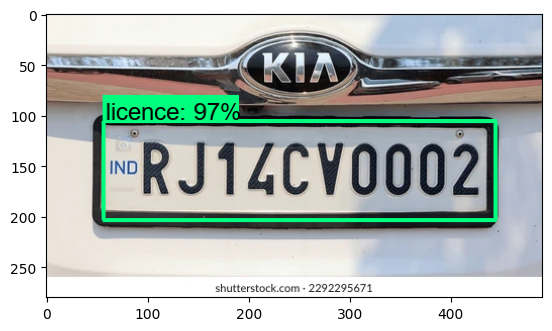

In [16]:
%matplotlib inline
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

<h2><b>OCR Setup</b></h2>

In [18]:
!pip install easyocr==1.6.2
!pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113

   ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
   ---------------------------------------- 2.9/2.9 MB 27.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 27.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/204.1 MB ? eta -:--:--
   - -------------------------------------- 8.4/204.1 MB 47.2 MB/s eta 0:00:05
   --- ------------------------------------ 16.5/204.1 MB 41.7 MB/s eta 0:00:05
   ---- ----------------------------------- 23.3/204.1 MB 38.8 MB/s eta 0:00:05
   ----- ---------------------------------- 28.0/204.1 MB 34.2 MB/s eta 0:00:06
   ------ --------------------------------- 30.7/204.1 MB 30.0 MB/s eta 0:00:06
   ------ --------------------------------- 33.3/204.1 MB 26.8 MB/s eta 0:00:07
   ------- -------------------------------- 36.2/204.1 MB 24.7 MB/s eta 0:00:07
   ------- -------------------------------- 39.3/204.1 MB 23.4 MB/s eta 0:00:0

<h2><b>Applying OCR to Detection</b></h2>

In [13]:
import torch
print(torch.__version__)  
print(torch.cuda.is_available())

1.12.1+cu113
False


C:\Users\Sid\PlateRecogSystem\anprsys\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
import easyocr
detection_threshold = 0.7

C:\Users\Sid\PlateRecogSystem\anprsys\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
image = image_np_with_detections
scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
boxes = detections['detection_boxes'][:len(scores)]
classes = detections['detection_classes'][:len(scores)]

In [19]:
width = image.shape[1]
height = image.shape[0]

[0.38200432 0.11549872 0.72647566 0.90656906]
[106.96120977  56.70987231 203.41318369 445.12541026]
[([[4, 34], [40, 34], [40, 58], [4, 58]], 'IND', 0.9995697841035681), ([[28, 10], [384, 10], [384, 84], [28, 84]], 'RJiLCVOO02]', 0.2619379577455026)]


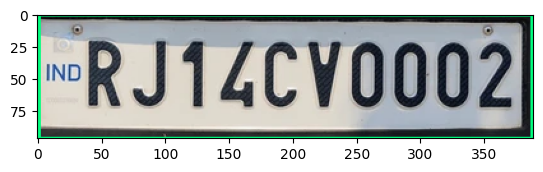

In [23]:
#Apply ROI filtering and OCR
for idx, box in enumerate(boxes):
    print(box)
    roi = box*[height, width, height, width]
    print(roi)
    region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    reader = easyocr.Reader(['en'])
    ocr_result = reader.readtext(region)
    print(ocr_result)
    plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))

<h2><b>Filtering OCR Output</b></h2>

In [24]:
region_threshold = 0.6
def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate
filter_text(region, ocr_result, region_threshold)

['RJiLCVOO02]']

<h2><b>Final Filtered ROI Output Function</b></h2>

In [25]:
region_threshold = 0.6
def ocr_it(image, detections, detection_threshold, region_threshold):
    
    #Scores, boxes and classes above threhold
    scores = list(filter(lambda x: x> detection_threshold, detections['detection_scores']))
    boxes = detections['detection_boxes'][:len(scores)]
    classes = detections['detection_classes'][:len(scores)]
    
    #Full image dimensions
    width = image.shape[1]
    height = image.shape[0]
    
    #Apply ROI filtering and OCR
    for idx, box in enumerate(boxes):
        roi = box*[height, width, height, width]
        region = image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
        reader = easyocr.Reader(['en'])
        ocr_result = reader.readtext(region)
        
        text = filter_text(region, ocr_result, region_threshold)
        
        plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
        plt.show()
        print(text)
        return text, region

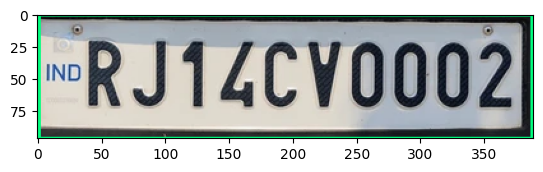

['RJiLCVOO02]']


In [26]:
text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)

<h2><b>Use Webcam for Detections</b></h2>

In [27]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)
    
    try: 
        text, region = ocr_it(image_np_with_detections, detections, detection_threshold, region_threshold)
        save_results(text, region, 'realtimeresults.csv', 'Detection_Images')
    except:
        pass

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-8vfej43a\opencv\modules\highgui\src\window.cpp:679: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
